In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml24\contents\2':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml24\contents\2')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_3828\2533430117.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\importlib\\_bootstrap.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\importlib\\_bootstrap_external.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\zipimport.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\codecs.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\encodings\\aliases.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\encodings\\__init__.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\encodings\\utf_8.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\encodings\\cp1252.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\abc.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\io.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\stat.py": 1701712589.0, "C:\\Users\\Xinli\\miniforge3\\envs\\ds24\\Lib\\_collections_abc.py": 1701712589.0, "C:\\Users\\Xinli\\min

In [2]:
import numpy as np

def classify_kNN(inX, X, y, k=5):
    # compute the distance between each row of X and Xmat
    Dmat = np.sqrt(((inX - X)**2).sum(axis=1))
    # sort by distance
    k = min(k, Dmat.shape[0])
    argsorted = Dmat.argsort()[:k]
    relatedy = y[argsorted]
    # count the freq. of the first k labels
    labelcounts = np.unique(relatedy, return_counts=True)
    # find the label with the most counts
    label = labelcounts[0][labelcounts[1].argmax()]
    return label

In [3]:
#| eval: false
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform',
                           algorithm='brute', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [4]:
import numpy as np

def encodeNorm(X, parameters=None):
    # parameters contains minVals and ranges
    if parameters is None:
        minVals = np.min(X, axis=0)
        maxVals = np.max(X, axis=0)
        ranges = np.maximum(maxVals - minVals, np.ones(minVals.size))
        parameters = {'ranges': ranges, 'minVals': minVals}
    else:
        minVals = parameters['minVals']
        ranges = parameters['ranges']
    Nmat = np.tile(minVals, (X.shape[0], 1))
    Xnorm = (X - Nmat)/ranges
    return (Xnorm, parameters)


def decodeNorm(X, parameters):
    # parameters contains minVals and ranges
    ranges = parameters['ranges']
    minVals = parameters['minVals']
    Nmat = np.tile(minVals, (X.shape[0], 1))
    Xoriginal = X * ranges + Nmat
    return Xoriginal

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

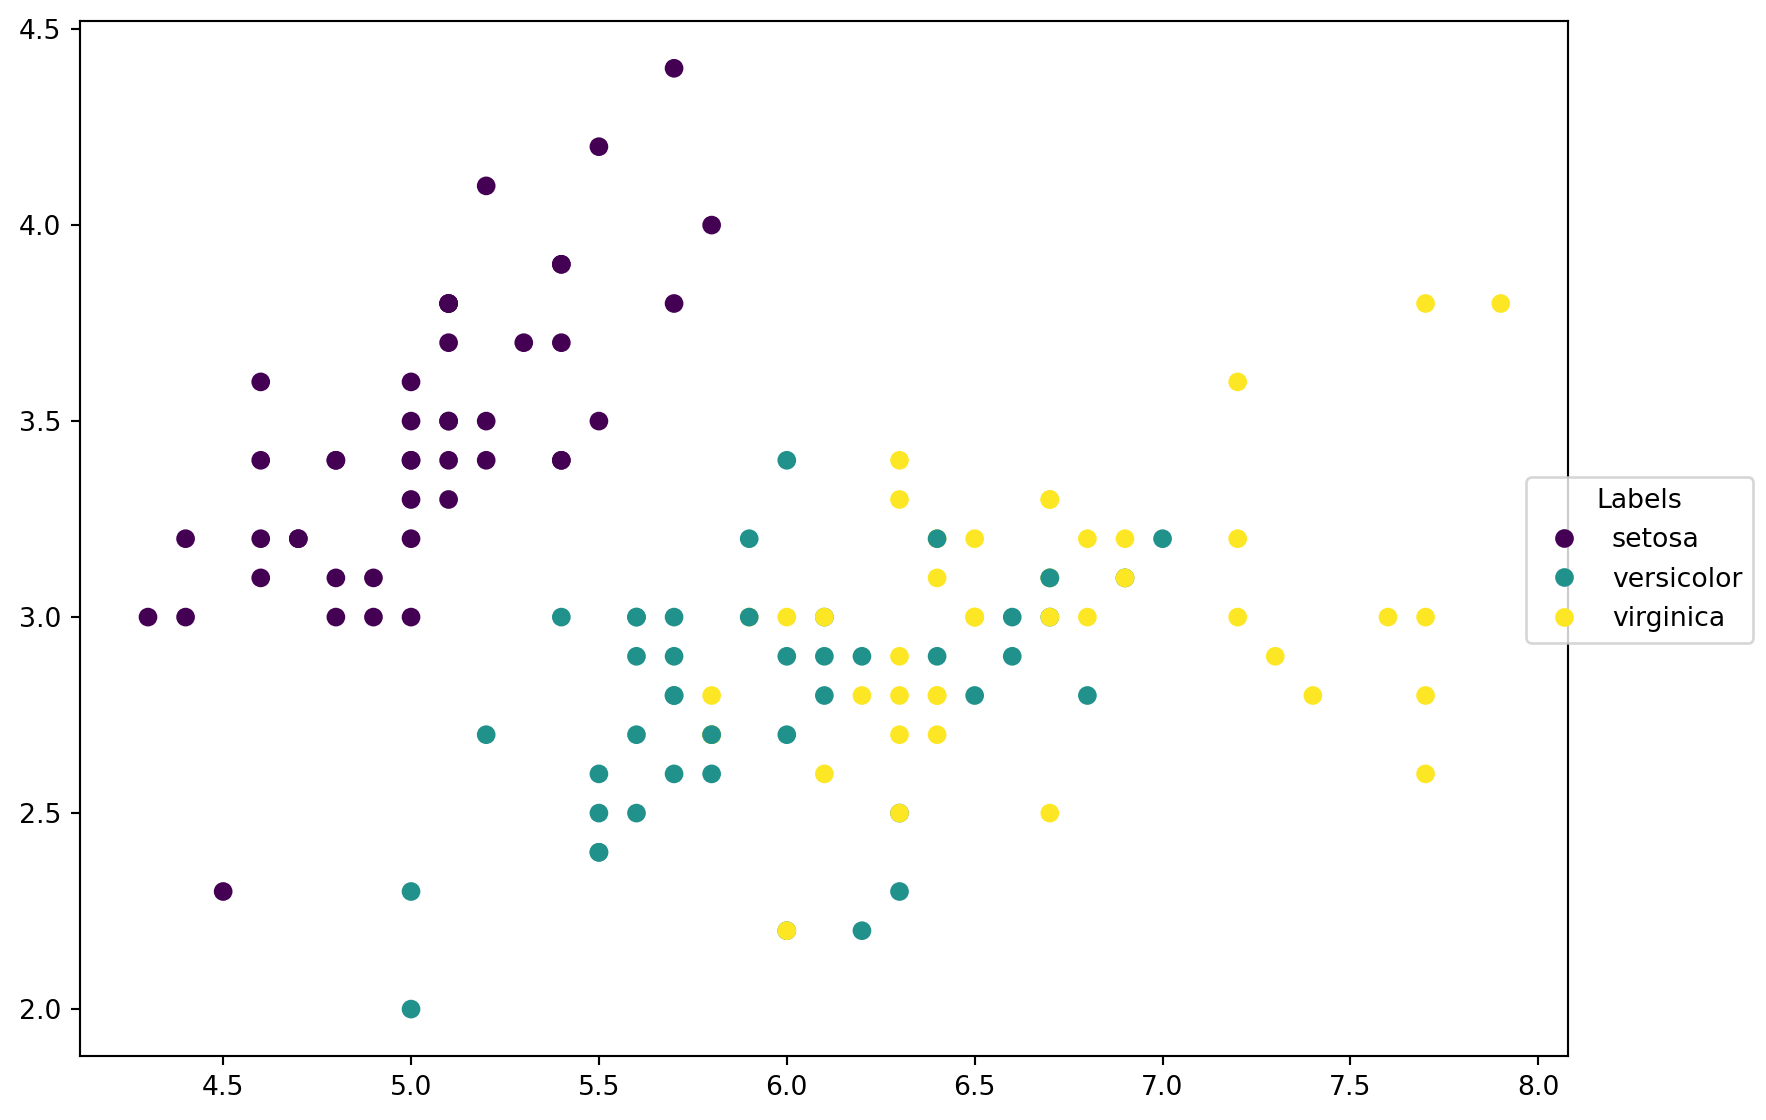

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot.
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

# Generate legends.
labels = ['setosa', 'versicolor', 'virginica']
_ = fig.legend(handles=scatter.legend_elements()[0], labels=labels,
               loc="right", title="Labels")

In [8]:
#| eval: false
y_pred = classify_kNN(X_test, X_train, y_train, k=10)

In [9]:
n_neighbors = 10
y_pred = list()
for row in X_test_norm:
    row_pred = classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
    y_pred.append(row_pred)
y_pred = np.array(y_pred)

In [10]:
n_neighbors = 10
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_norm])

In [11]:
acc = np.mean(y_pred == y_test)
acc

0.7333333333333333

In [12]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 10
clf = KNeighborsClassifier(n_neighbors, weights="uniform", metric="euclidean",
                           algorithm='brute')
clf.fit(X_train_norm, y_train)
y_pred_sk = clf.predict(X_test_norm)

acc = np.mean(y_pred_sk == y_test)
acc

0.7333333333333333

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
accuracy_score(y_pipe, y_test)

0.7333333333333333

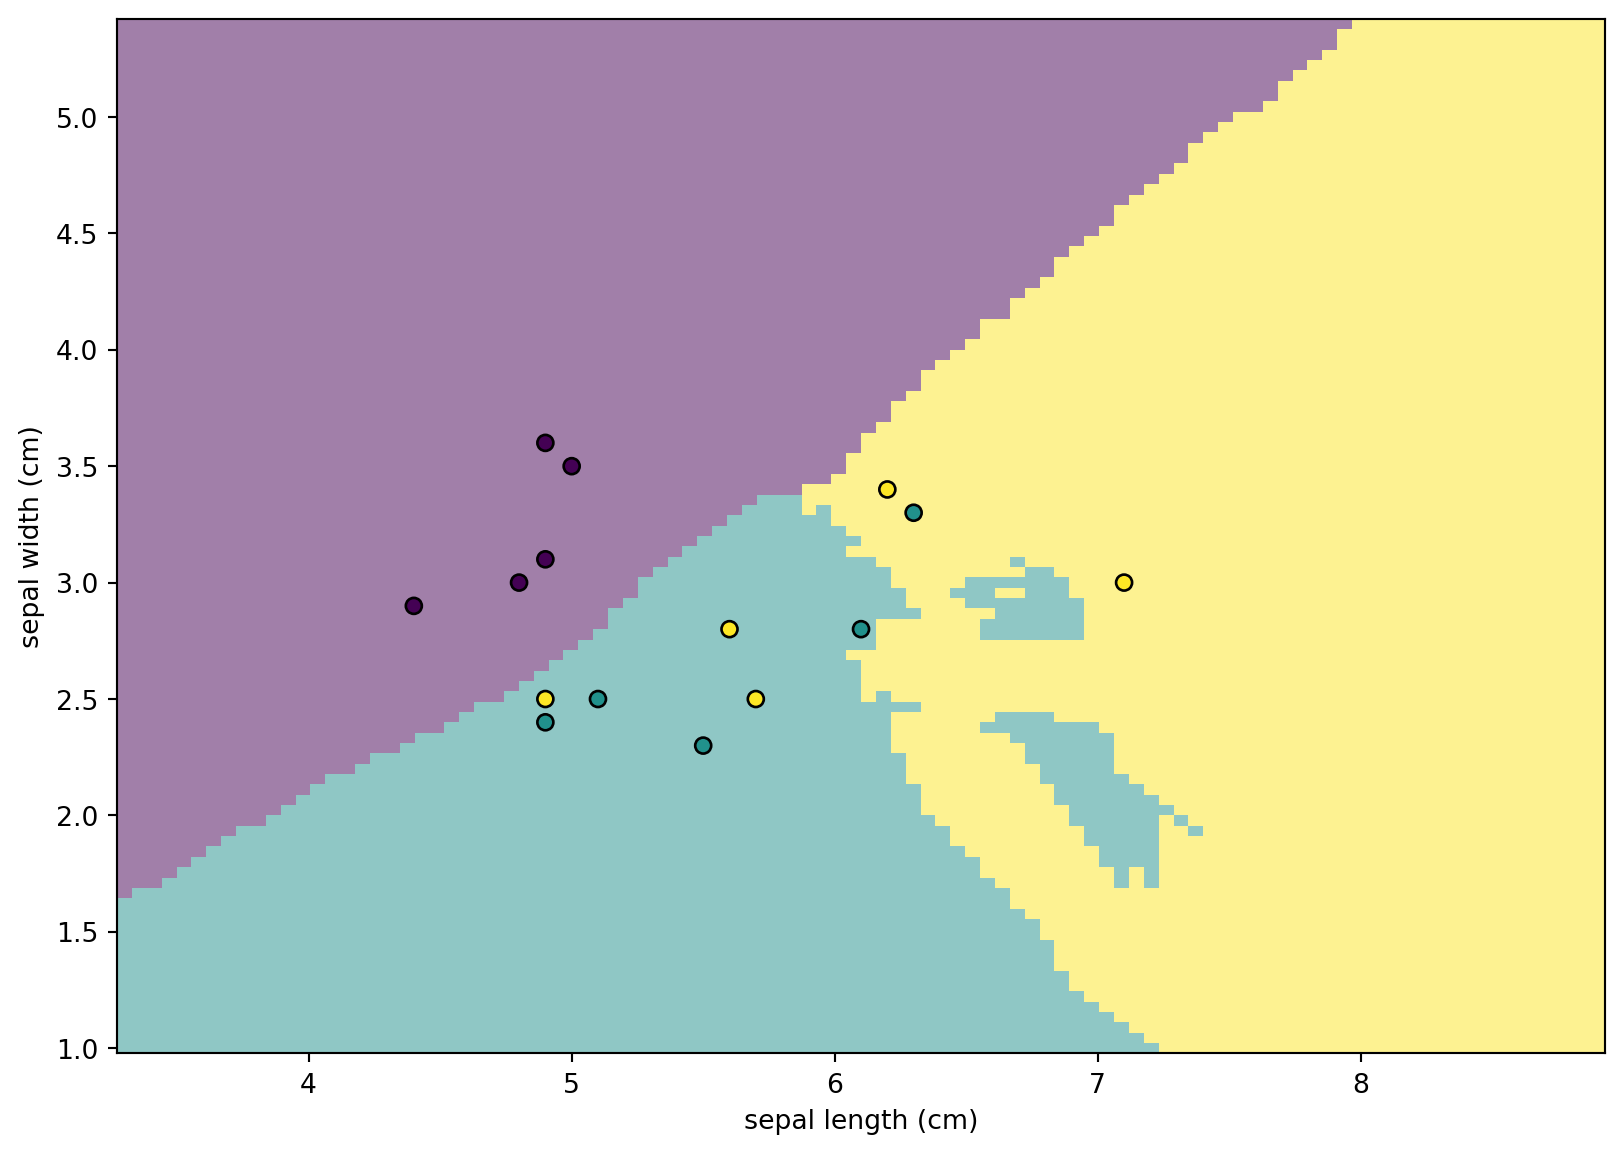

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
            pipe, 
            X_train,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
            alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
disp.figure_.set_size_inches((10,7))

In [15]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe, X, y, cv=5)
cv_scores

array([0.66666667, 0.8       , 0.63333333, 0.8       , 0.7       ])

In [16]:
np.mean(cv_scores)

0.7200000000000001

In [17]:
from sklearn.model_selection import GridSearchCV
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
clf.best_estimator_.get_params()["knn__n_neighbors"]

35

In [18]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
np.mean(cv_scores)

0.82

In [19]:
#| echo: false
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assests/datasets/datingTestSet2.txt', sep='\t', header=None)
df.head()

,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


In [20]:
#| eval: false
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datingTestSet2.txt', sep='\t', header=None)
df.head()

In [21]:
df = df.rename(columns={0: "Mileage", 1: "Gamingtime", 2: 'Icecream', 3: 'Rating'})
df.head()

,Mileage,Gamingtime,Icecream,Rating
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


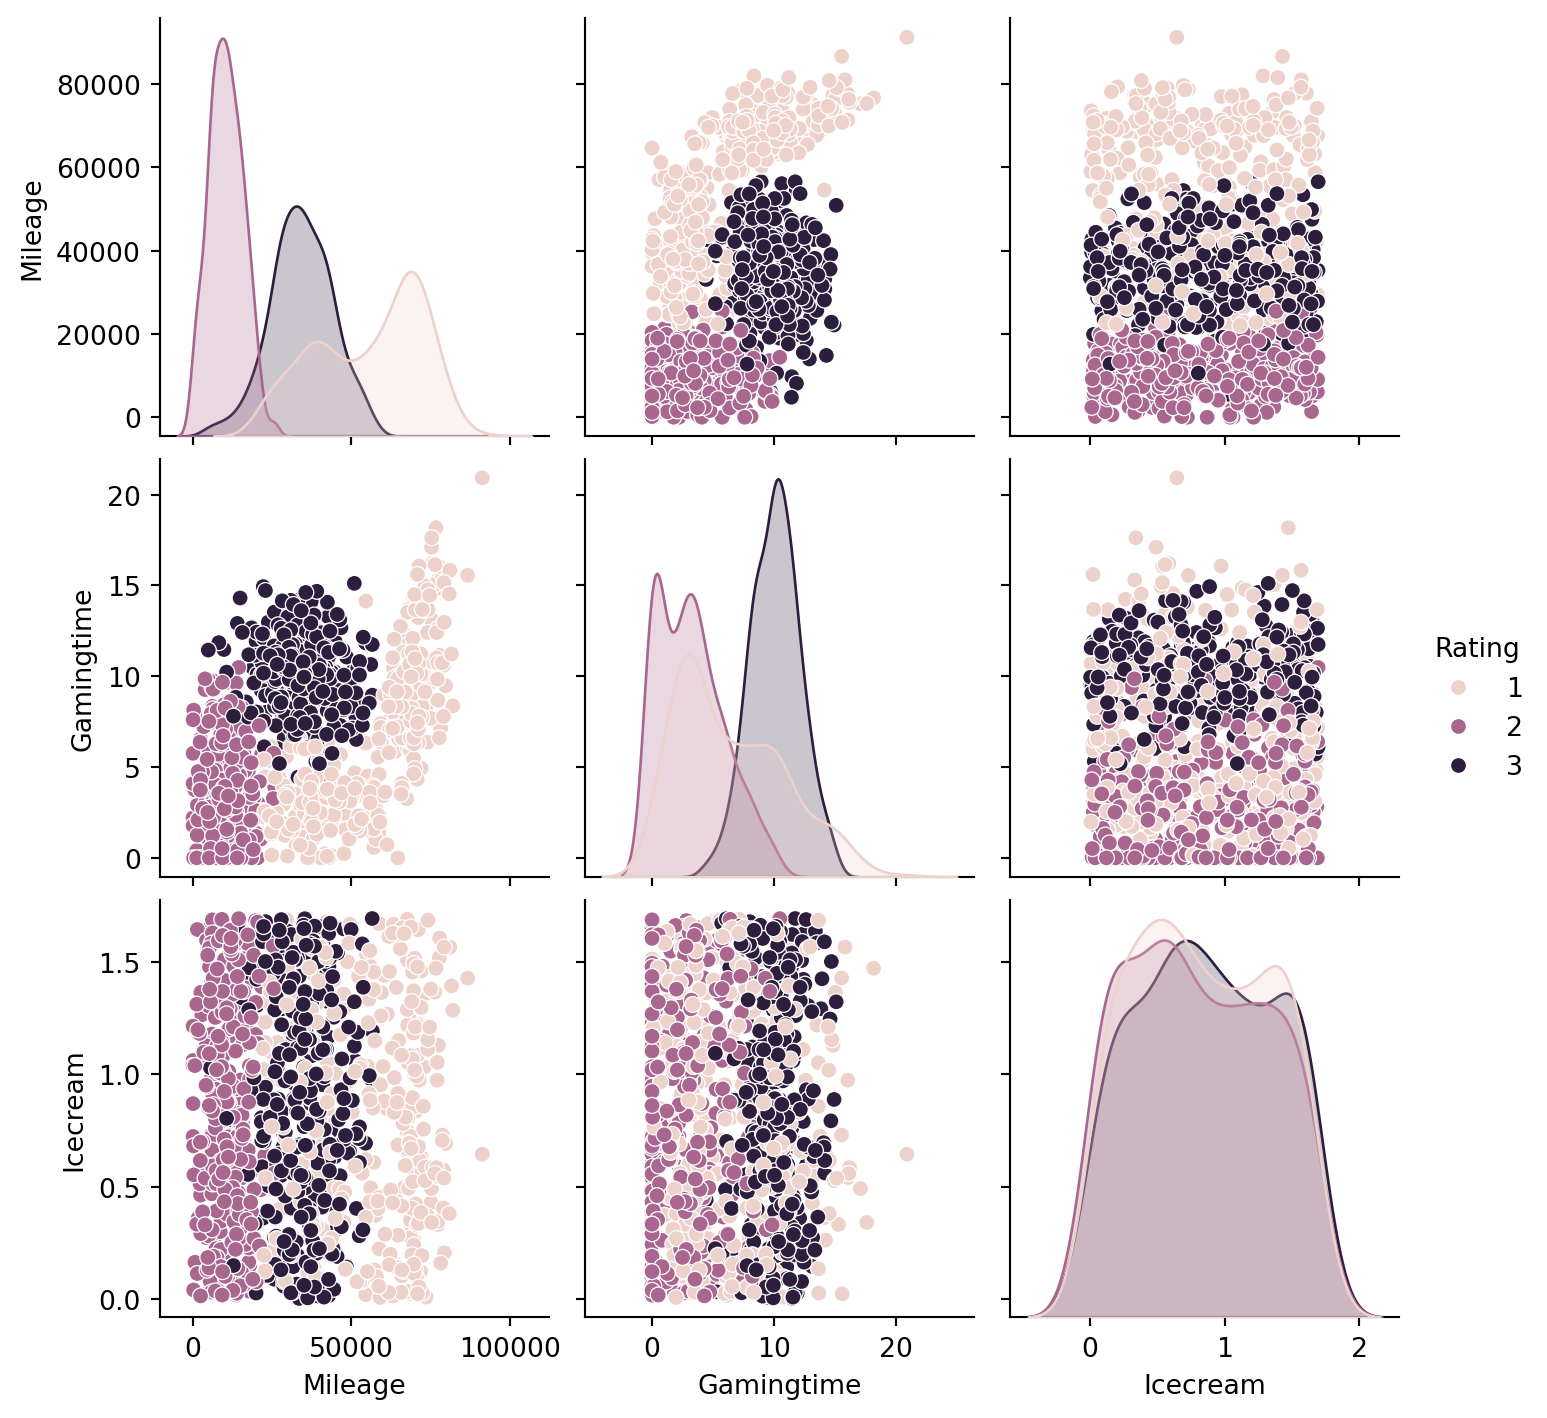

In [22]:
import seaborn as sns
sns.pairplot(data=df, hue='Rating')

In [23]:
from sklearn.model_selection import train_test_split
X = np.array(df[['Mileage', 'Gamingtime', 'Icecream']])
y = np.array(df['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40, stratify=y)

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

In [24]:
# Using our codes.
n_neighbors = 10
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_norm])

acc = np.mean(y_pred == y_test)
acc

0.93

In [25]:
# Using sklearn.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
accuracy_score(y_pipe, y_test)

0.93

In [26]:
from sklearn.model_selection import GridSearchCV, cross_val_score
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
clf.best_estimator_.get_params()["knn__n_neighbors"]

4

In [27]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
np.mean(cv_scores)

0.952

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = datasets.load_digits().images
y = datasets.load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [29]:
X_train.shape

(1527, 8, 8)

In [30]:
y_train.shape

(1527,)

In [31]:
X_test.shape

(270, 8, 8)

In [32]:
y_test.shape

(270,)

In [33]:
type(X_train)

numpy.ndarray

In [34]:
#| echo: false
#| output: false
tr0 = X_train.shape[0]
te0 = X_test.shape[0]
yt0 = y_train[0]

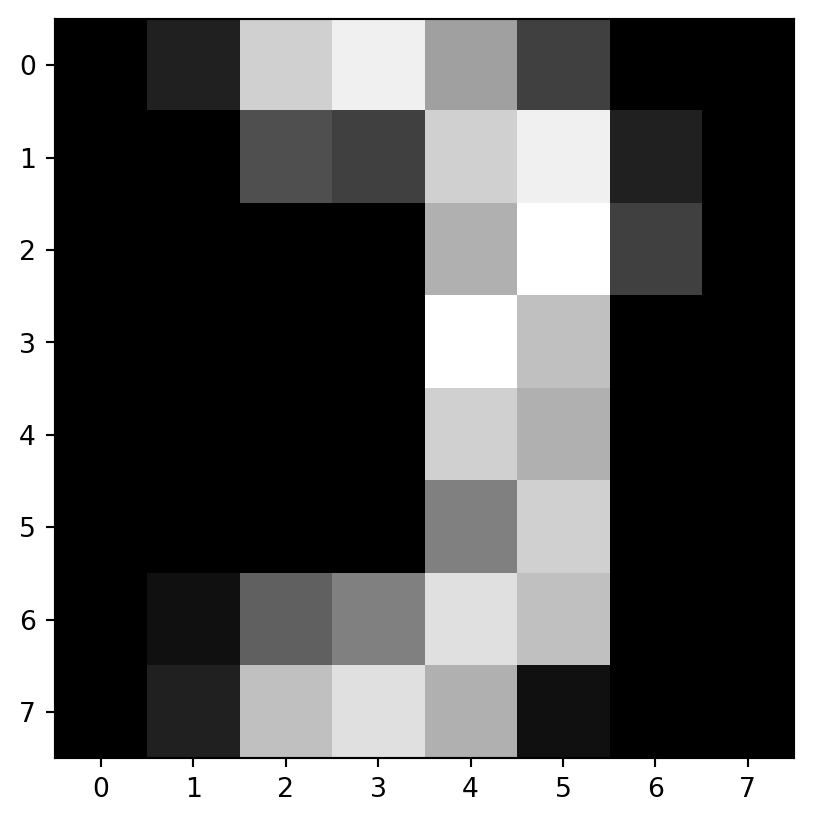

In [35]:
digit = X_train[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')

In [36]:
y_train[0]

3

In [37]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

In [38]:
import numpy as np

n_neighbors = 10
X_test_sample = X_test_norm
y_test_sample = y_test
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_sample])

acc = np.mean(y_pred == y_test_sample)
acc

0.9666666666666667

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
accuracy_score(y_pipe, y_test)

0.9666666666666667

In [40]:
#| echo: false

import pandas as pd
name = ['x', '1.5', '2.5', '3.5', '4.5', '5.0', '5.5', '5.75', '6.5', '7.5', '10.5']
data = [['y', '+', '+', '-', '-', '-', '+', '+', '-', '+', '+']]
df = pd.DataFrame(data, columns=name)
df.style.hide(axis='index')

x,1.5,2.5,3.5,4.5,5.0,5.5,5.75,6.5,7.5,10.5
y,+,+,-,-,-,+,+,-,+,+
